In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
#import to pandas
data_file = open("out2.csv")
results = pd.read_csv(data_file,header=None,sep=" ")
names = ["solution_depth","example_no","algorithm","policy","path_length","visited","processed","recursed","time"]
results.columns=names
results.head()

,solution_depth,example_no,algorithm,policy,path_length,visited,processed,recursed,time
0,1,1,astr,hamm,1,2,1,1,0.0
1,1,1,astr,manh,1,2,1,1,0.0
2,1,1,bfs,drlu,1,0,1,1,0.0
3,1,1,bfs,drul,1,0,1,1,0.0
4,1,1,bfs,ludr,1,2,1,1,0.0


In [3]:
#bad astr
ba = results[results.path_length>results.solution_depth]
ba = ba[ba.algorithm == "astr"]
from collections import Counter
counter = Counter(ba.policy)

print(counter)
ba


Counter({'hamm': 25})


,solution_depth,example_no,algorithm,policy,path_length,visited,processed,recursed,time
2592,6,51,astr,hamm,10,921,524,20,0.048
3870,7,15,astr,hamm,11,44,20,11,0.002
3978,7,21,astr,hamm,11,47,21,11,0.002
4086,7,27,astr,hamm,19,4244,2648,20,0.223
4212,7,34,astr,hamm,17,7027,4271,20,0.384
4392,7,44,astr,hamm,13,275,141,20,0.014
4446,7,47,astr,hamm,17,813,472,20,0.043
4680,7,60,astr,hamm,9,29,12,9,0.001
4770,7,65,astr,hamm,13,695,404,20,0.036
4914,7,73,astr,hamm,13,79,35,13,0.004


In [4]:
#When patch not found replace path_length with recursion depth
no_solution = results[results.path_length==-1]
results = results.replace({-1:20})
no_solution

,solution_depth,example_no,algorithm,policy,path_length,visited,processed,recursed,time
67,2,2,dfs,lurd,-1,206312,202889,20,12.521
71,2,2,dfs,ulrd,-1,138283,135835,20,8.335
84,2,3,dfs,ludr,-1,138283,135835,20,8.491
88,2,3,dfs,uldr,-1,206312,202889,20,12.575
138,3,2,dfs,ludr,-1,264556,259508,20,16.573
142,3,2,dfs,uldr,-1,192185,189035,20,11.602
157,3,3,dfs,lurd,-1,216443,213015,20,13.098
172,3,4,dfs,drlu,-1,131903,129407,20,7.893
191,3,5,dfs,drul,-1,140393,138177,20,8.347
197,3,5,dfs,ulrd,-1,151990,149199,20,9.153


In [5]:
def get_color_iter(lenght):
    return iter(cm.Dark2(np.linspace(0, 1, lenght)))

In [6]:
column_chart_name={
    "visited":"Średnia ilość odwiedzonych stanów",
    "path_length":"Średnia długość rozwiązania",
    "processed":"Średnia ilość przetworzonych stanów",
    "recursed":"Średnia maksymalna głębokość rekursji",
    "time":"Średnia czas przetwarzania [s]"
}

In [7]:
def resultAlgFromStr(alg_name):
    return results[results.algorithm == str(alg_name)]

In [8]:
def avg(name,data_label):
    data = resultAlgFromStr(name)
    avgs=[]
    max_solution_depth = max(results.solution_depth)
    for sol_depth in range(1,max_solution_depth+1):
        current_solution = data[data.solution_depth==sol_depth]
        avgs.append(np.average(current_solution[data_label]))
    return avgs

In [9]:
def plotThreeAlgs(series_name):
    width = 0.25
    bfs_avg = avg("bfs",series_name)
    dfs_avg = avg("dfs",series_name)
    astr_avg = avg("astr",series_name)

    max_solution_depth = max(results.solution_depth)
    pos = np.arange(max_solution_depth)+1
    colors= get_color_iter(2)
    plt.bar(pos-(width*1.5),bfs_avg,width,label="bfs", color = next(colors),align="edge")
    plt.bar(pos,dfs_avg,width,label="dfs", color = "lime")
    plt.bar(pos+width*0.5,astr_avg,width,label="astr", color = next(colors),align="edge")
    plt.minorticks_on()
    plt.grid(True,which="major",axis="y",ls="--", color="black")
    plt.legend(title="ALgorytm:")
    plt.xlabel("Głębokość układu początkowego")

In [10]:
def plot_all_algs(series_name,ycale="log"):
    plotThreeAlgs(series_name)
    plt.ylabel(column_chart_name[series_name])
    plt.title("Wszystkie algorytmy: "+ column_chart_name[series_name])
    plt.yscale(ycale)
    plt.savefig("ALL_"+series_name)
    plt.show()

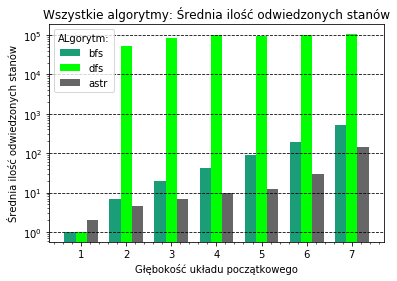

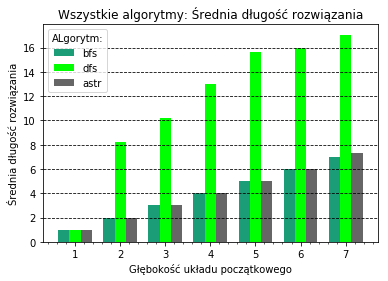

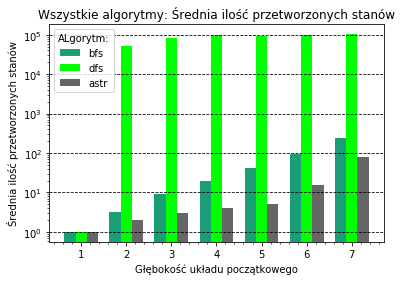

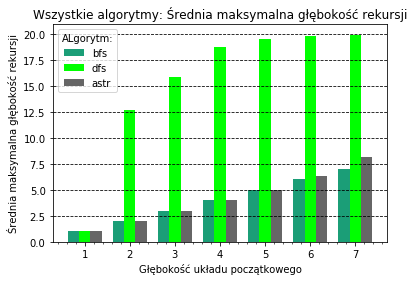

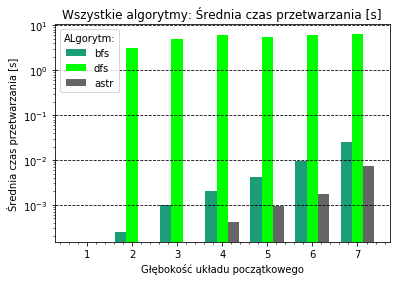

In [11]:
plot_all_algs("visited")
plot_all_algs("path_length","linear")
plot_all_algs("processed")
plot_all_algs("recursed","linear")
plot_all_algs("time")

In [ ]:
overview = results.groupby(["algorithm","solution_depth"]).mean()
overview

example_no  path_length        visited  \
algorithm solution_depth                                           
astr      1                      1.5     1.000000       2.000000   
          2                      2.5     2.000000       4.500000   
          3                      5.5     3.000000       7.000000   
          4                     12.5     4.000000       9.625000   
          5                     27.5     5.000000      11.953704   
          6                     54.0     6.018692      30.107477   
          7                    106.5     7.339623     139.712264   
bfs       1                      1.5     1.000000       1.000000   
          2                      2.5     2.000000       7.000000   
          3                      5.5     3.000000      19.300000   
          4                     12.5     4.000000      42.250000   
          5                     27.5     5.000000      88.166667   
          6                     54.0     6.000000     196.518692   
          7                    106.5     7.000000     504.645047   
dfs       1                      1.5     1.000000       1.000000   
          2                      2.5     8.250000   51621.250000   
          3                      5.5    10.200000   83742.300000   
          4                     12.5    13.020833  101008.854167   
          5                     27.5    15.597222   93960.106481   
          6                     54.0    15.995327  102112.112150   
          7                    106.5    17.060142  104901.188679   

                              processed   recursed      time  
algorithm solution_depth                                      
astr      1                    1.000000   1.000000  0.000000  
          2                    2.000000   2.000000  0.000000  
          3                    3.000000   3.000000  0.000000  
          4                    4.020833   4.000000  0.000417  
          5                    5.111111   5.000000  0.000935  
          6                   15.462617   6.289720  0.001776  
          7                   80.943396   8.160377  0.007401  
bfs       1                    1.000000   1.000000  0.000000  
          2                    3.250000   2.000000  0.000250  
          3                    8.900000   3.000000  0.001013  
          4                   19.750000   4.000000  0.002057  
          5                   41.166667   5.000000  0.004222  
          6                   93.037383   6.018692  0.009577  
          7                  240.912736   7.018868  0.025637  
dfs       1                    1.000000   1.000000  0.000000  
          2                50750.625000  12.625000  3.121500  
          3                82301.575000  15.825000  5.065862  
          4                99286.010417  18.708333  6.102214  
          5                92356.000000  19.458333  5.658734  
          6               100372.514019  19.799065  6.161717  
          7               103107.648585  19.910377  6.356159

In [ ]:
overview2 = results.groupby(["solution_depth","algorithm"],as_index=False).mean()
overview2

,solution_depth,algorithm,example_no,path_length,visited,processed,recursed,time
0,1,astr,1.5,1.000000,2.000000,1.000000,1.000000,0.000000
1,1,bfs,1.5,1.000000,1.000000,1.000000,1.000000,0.000000
2,1,dfs,1.5,1.000000,1.000000,1.000000,1.000000,0.000000
3,2,astr,2.5,2.000000,4.500000,2.000000,2.000000,0.000000
4,2,bfs,2.5,2.000000,7.000000,3.250000,2.000000,0.000250
5,2,dfs,2.5,8.250000,51621.250000,50750.625000,12.625000,3.121500
6,3,astr,5.5,3.000000,7.000000,3.000000,3.000000,0.000000
7,3,bfs,5.5,3.000000,19.300000,8.900000,3.000000,0.001013
8,3,dfs,5.5,10.200000,83742.300000,82301.575000,15.825000,5.065862
9,4,astr,12.5,4.000000,9.625000,4.020833,4.000000,0.000417


In [ ]:
bad_bfs = results[(results.solution_depth!=results.path_length)]
bad_bfs[bad_bfs.algorithm=="bfs"]

,solution_depth,example_no,algorithm,policy,path_length,visited,processed,recursed,time


In [ ]:
overview3 = results.groupby(["algorithm","solution_depth","policy"],as_index=False).mean()
overview3.head()

,algorithm,solution_depth,policy,example_no,path_length,visited,processed,recursed,time
0,astr,1,hamm,1.5,1.0,2.0,1.0,1.0,0.0
1,astr,1,manh,1.5,1.0,2.0,1.0,1.0,0.0
2,astr,2,hamm,2.5,2.0,4.5,2.0,2.0,0.0
3,astr,2,manh,2.5,2.0,4.5,2.0,2.0,0.0
4,astr,3,hamm,5.5,3.0,7.0,3.0,3.0,0.0


In [ ]:
    astr = overview3[overview3.algorithm=="astr"]
    astr = astr.drop(["example_no"],axis = 1)
    hamm= astr[astr.policy=="hamm"]
    manh = astr[astr.policy=="manh"]
    manh

,algorithm,solution_depth,policy,path_length,visited,processed,recursed,time
1,astr,1,manh,1.0,2.000000,1.000000,1.0,0.000000
3,astr,2,manh,2.0,4.500000,2.000000,2.0,0.000000
5,astr,3,manh,3.0,7.000000,3.000000,3.0,0.000000
7,astr,4,manh,4.0,9.583333,4.000000,4.0,0.000542
9,astr,5,manh,5.0,11.851852,5.074074,5.0,0.000926
11,astr,6,manh,6.0,14.738318,6.429907,6.0,0.001000
13,astr,7,manh,7.0,18.900943,8.283019,7.0,0.001005


In [ ]:
def a_str_plot_series(series):
    width = 0.3
    colors= get_color_iter(2)
    plt.bar(manh.solution_depth-width/2,manh[series],width, label = "manhatan",color = next(colors))
    plt.bar(hamm.solution_depth+width/2,hamm[series],width, label = "hamminga", color = next(colors))
    plt.xlabel("Głębokość układu początkowego")
    plt.minorticks_on()
    plt.grid(True,which="major",axis="y",ls="--", color="black")
    plt.grid(True,which="minor",axis="y",ls="--")
    plt.legend(title="Metryki:")

In [ ]:
def astr_plot(series_name,yscale="linear"):
    a_str_plot_series(series_name)
    plt.yscale(yscale)
    plt.ylabel(column_chart_name[series_name])
    plt.title("A*:"+column_chart_name[series_name])
    plt.savefig("ASTR_"+series_name)
    plt.show()

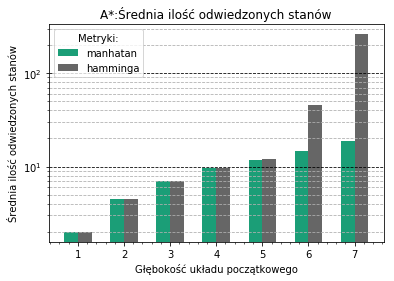

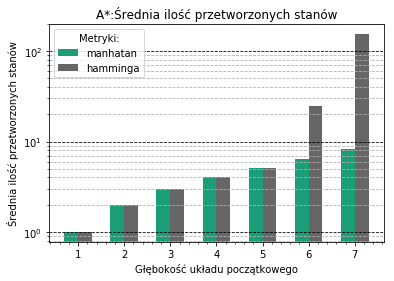

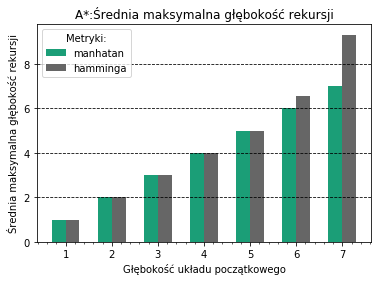

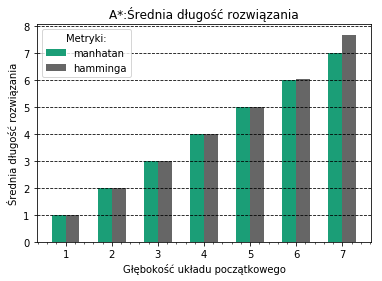

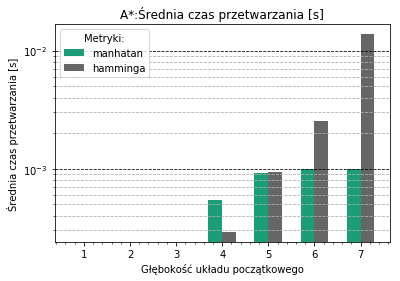

In [ ]:
astr_plot("visited","log")
astr_plot("processed","log")
astr_plot("recursed")
astr_plot("path_length")
astr_plot("time","log")


In [ ]:
def plot_multi_bar(df, series, ylabel, yscale="log"):
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.rc('legend', fontsize=12)
    plt.rc('axes', titlesize=15)
    
    fig = plt.figure(figsize=(18,5),dpi=400)
    ax1 = fig.add_subplot(111)

    bar_x_tick = []
    bar_x_label =[]
    bar_width = 0.1
    
    policies = list(set(df.policy))
    policy_len = len(policies)
    
    bar_number = policy_len
    start_x = np.arange(1,policy_len)-(bar_number*bar_width)/2
    colors = get_color_iter(policy_len)
    
    for no,pol in enumerate(policies):
        data = df[df.policy==pol]
        bar_pos = start_x+no*bar_width
        bar_x_tick.extend(bar_pos)
        bar_x_label.extend([pol]*7)
        ax1.bar(bar_pos,
                data[series],
                bar_width,
                align="edge",
                label = pol,
                color=next(colors))

    ax1.set_xlabel("Porządki przechodzenia")
    ax1.grid(True)

    ax2 = ax1.twiny()
    ax2.set_xlabel("Głębokość układu początkowego")
    ax1.set_ylabel(ylabel)

    ax2.set_xticks(range(0,8))
    ax2.set_xbound(ax1.get_xbound())
    ax1.set_xticks(bar_x_tick)

    ax1.set_xticklabels(bar_x_label, rotation='vertical')
    ax1.set_yscale(yscale)
    ax1.legend(title="Porządki:")

In [ ]:
bfs = overview3[overview3.algorithm=="bfs"]

dfs = overview3[overview3.algorithm=="dfs"]

In [ ]:
def plot_dfs(data_series,yscale="log"): 
    plot_multi_bar(dfs,data_series,column_chart_name[data_series],yscale)
    plt.title("DFS:"+column_chart_name[data_series])
    plt.savefig("DFS_"+data_series, bbox_inches='tight')
    plt.show()

In [ ]:
def plot_bfs(data_series,yscale="log"): 
    plot_multi_bar(bfs,data_series,column_chart_name[data_series],yscale)
    plt.title("BFS:"+column_chart_name[data_series])
    plt.savefig("BFS_"+data_series, bbox_inches='tight')
    plt.show()

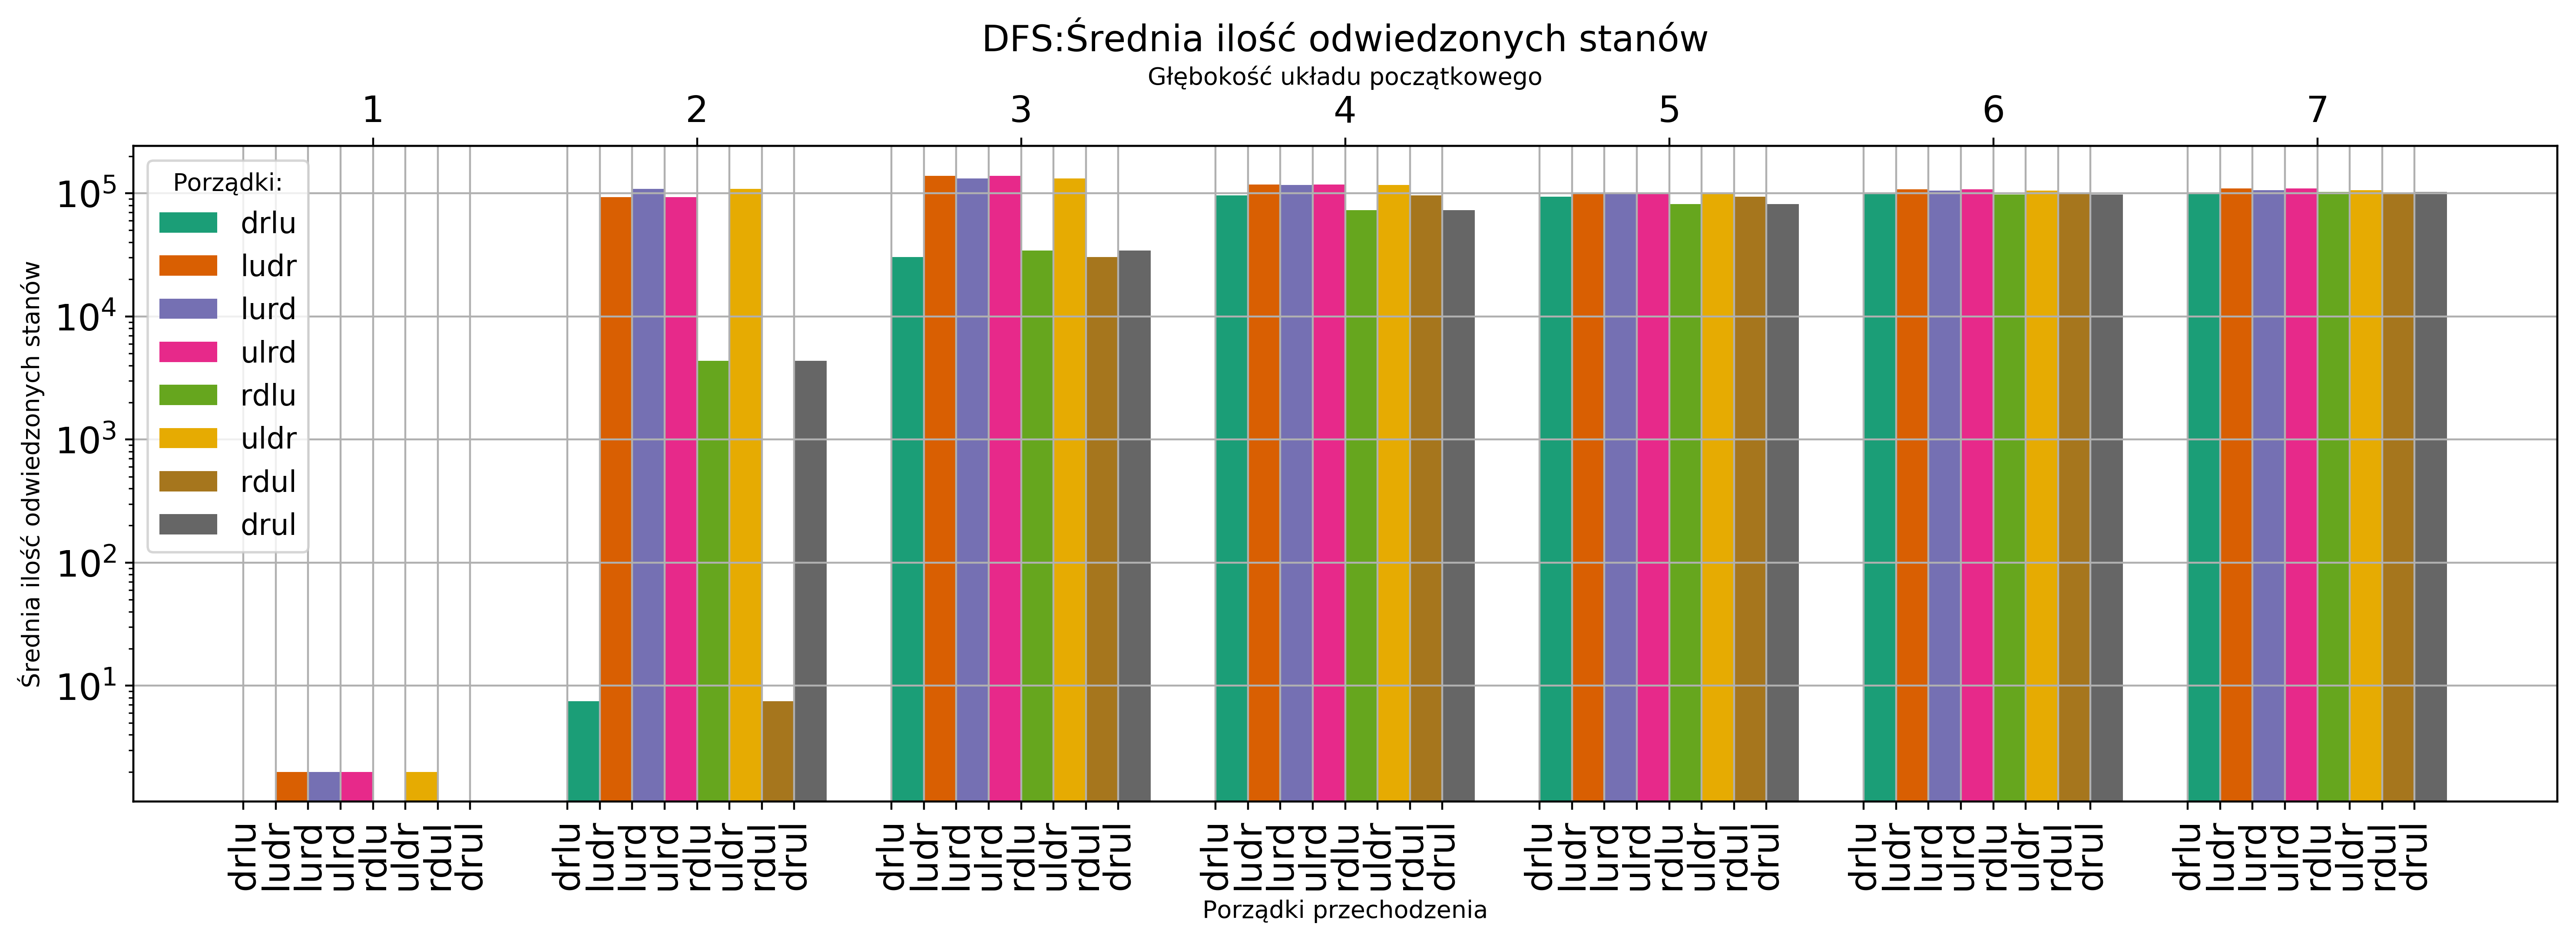

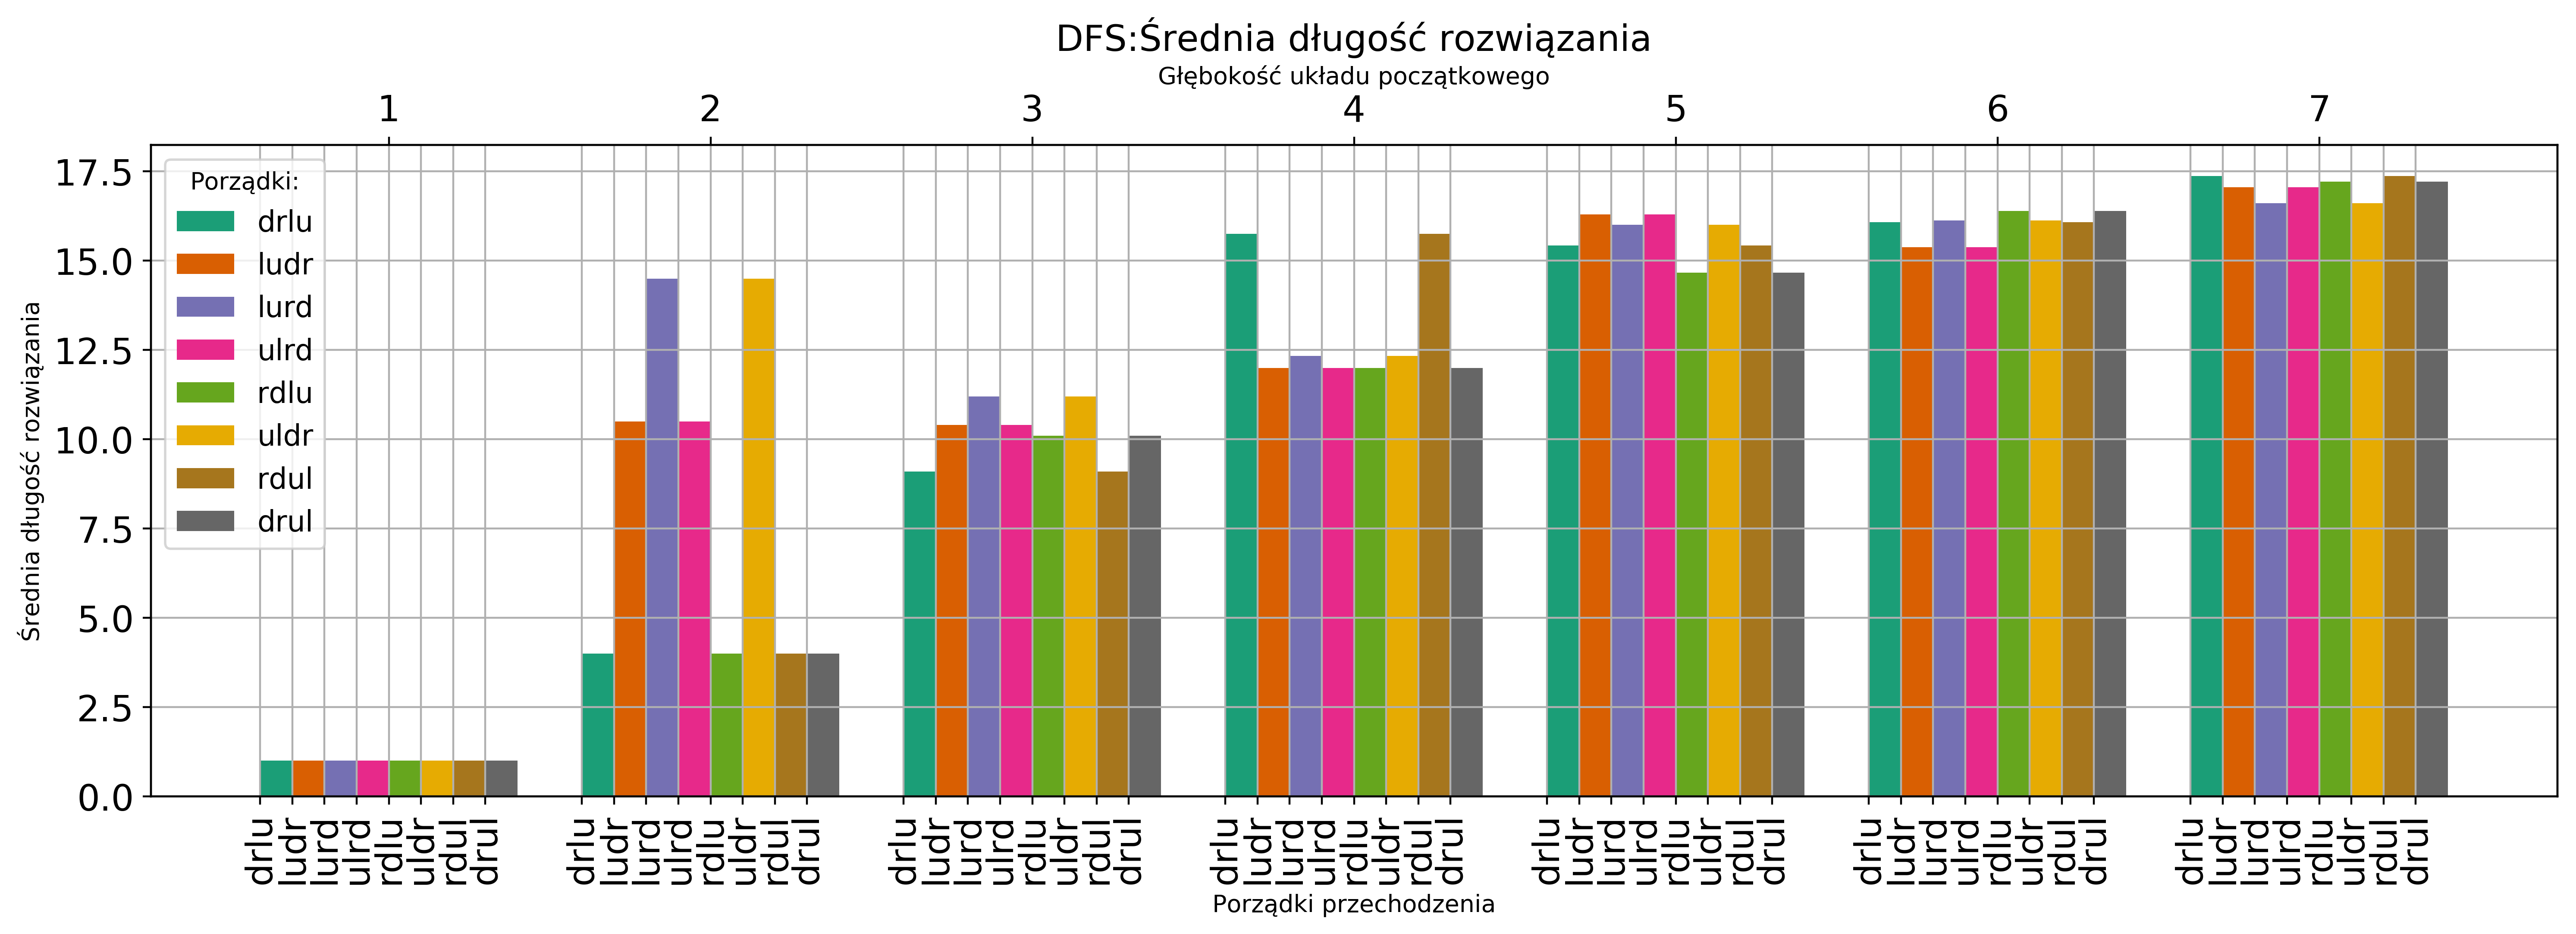

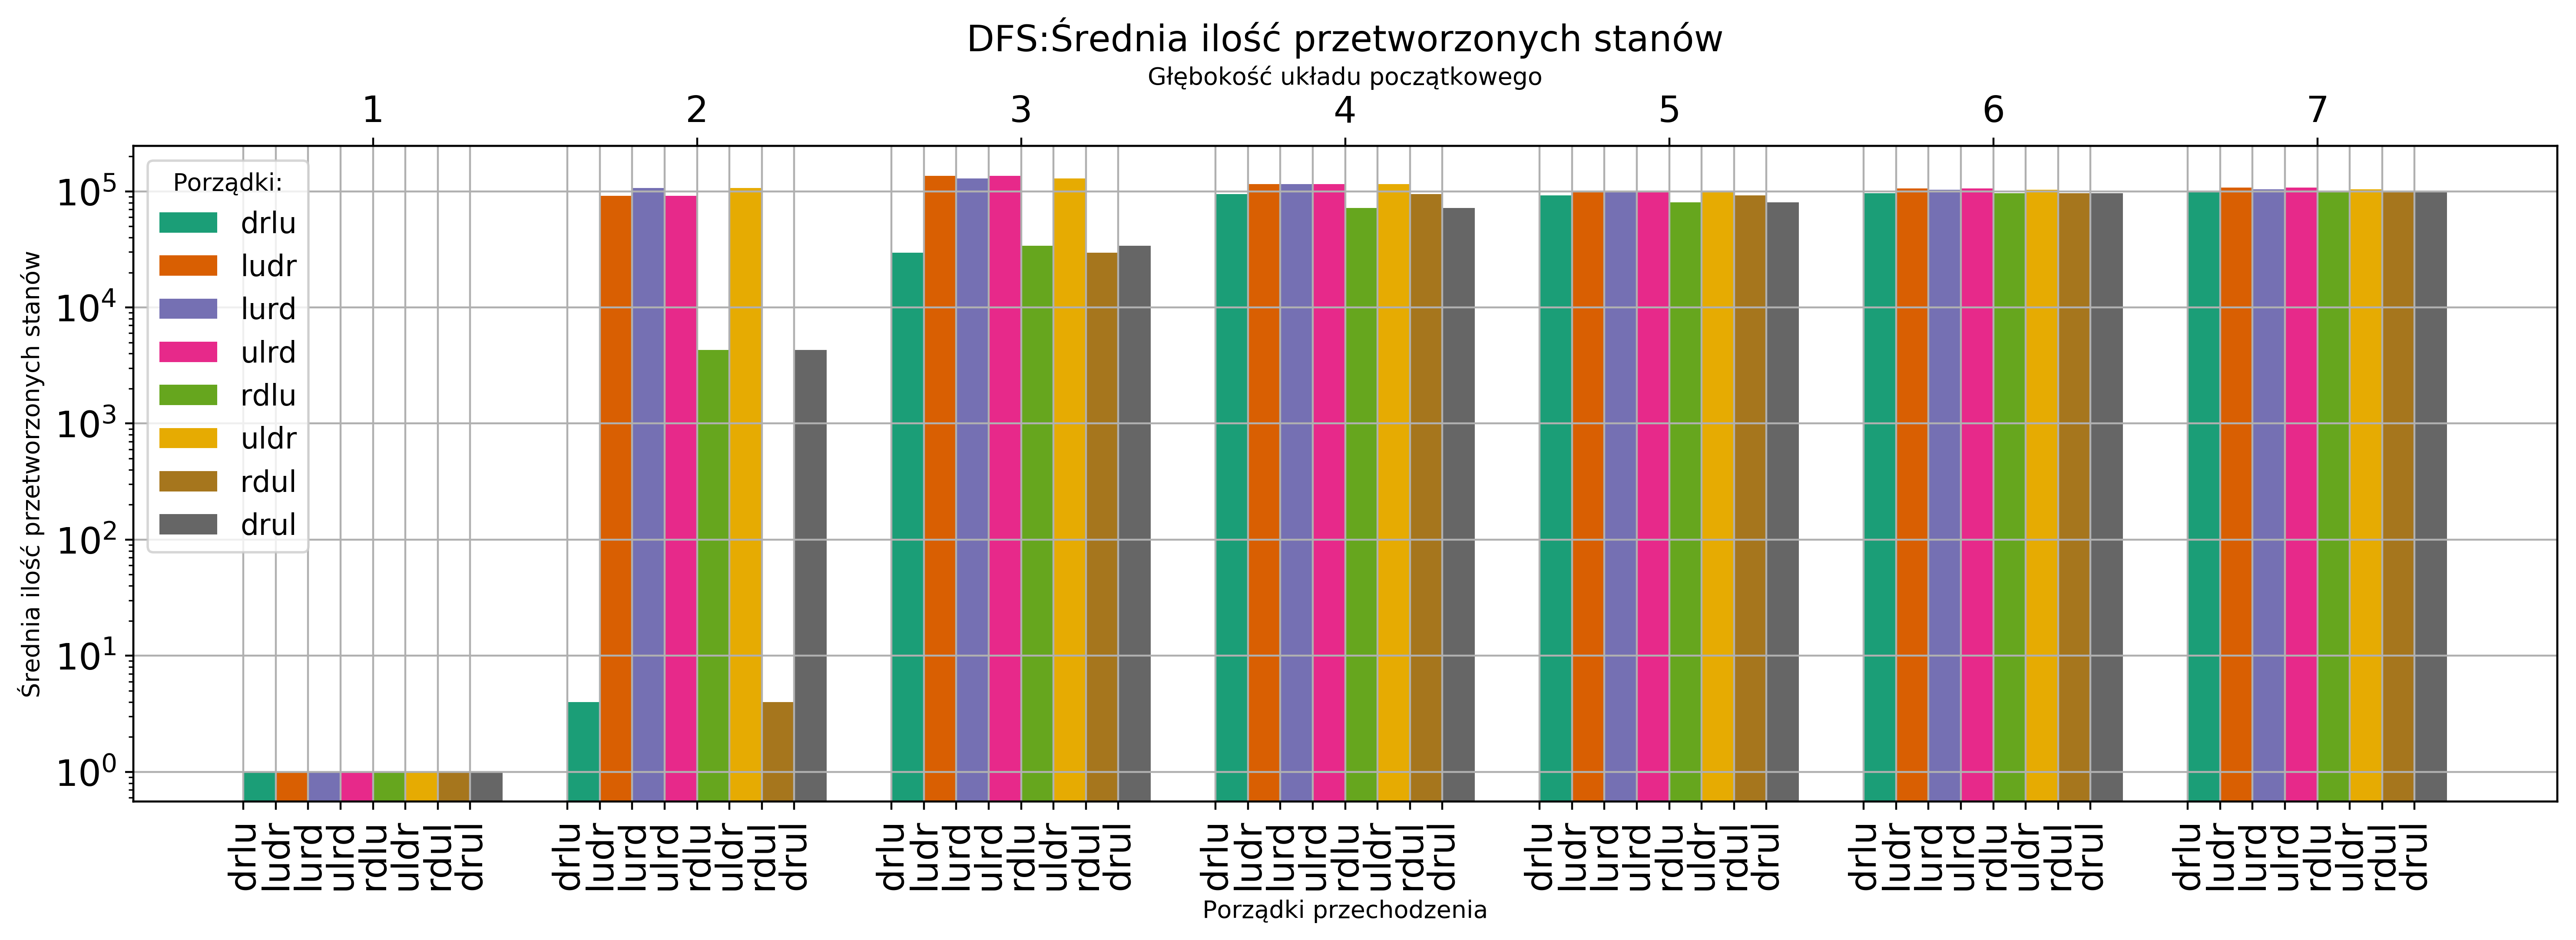

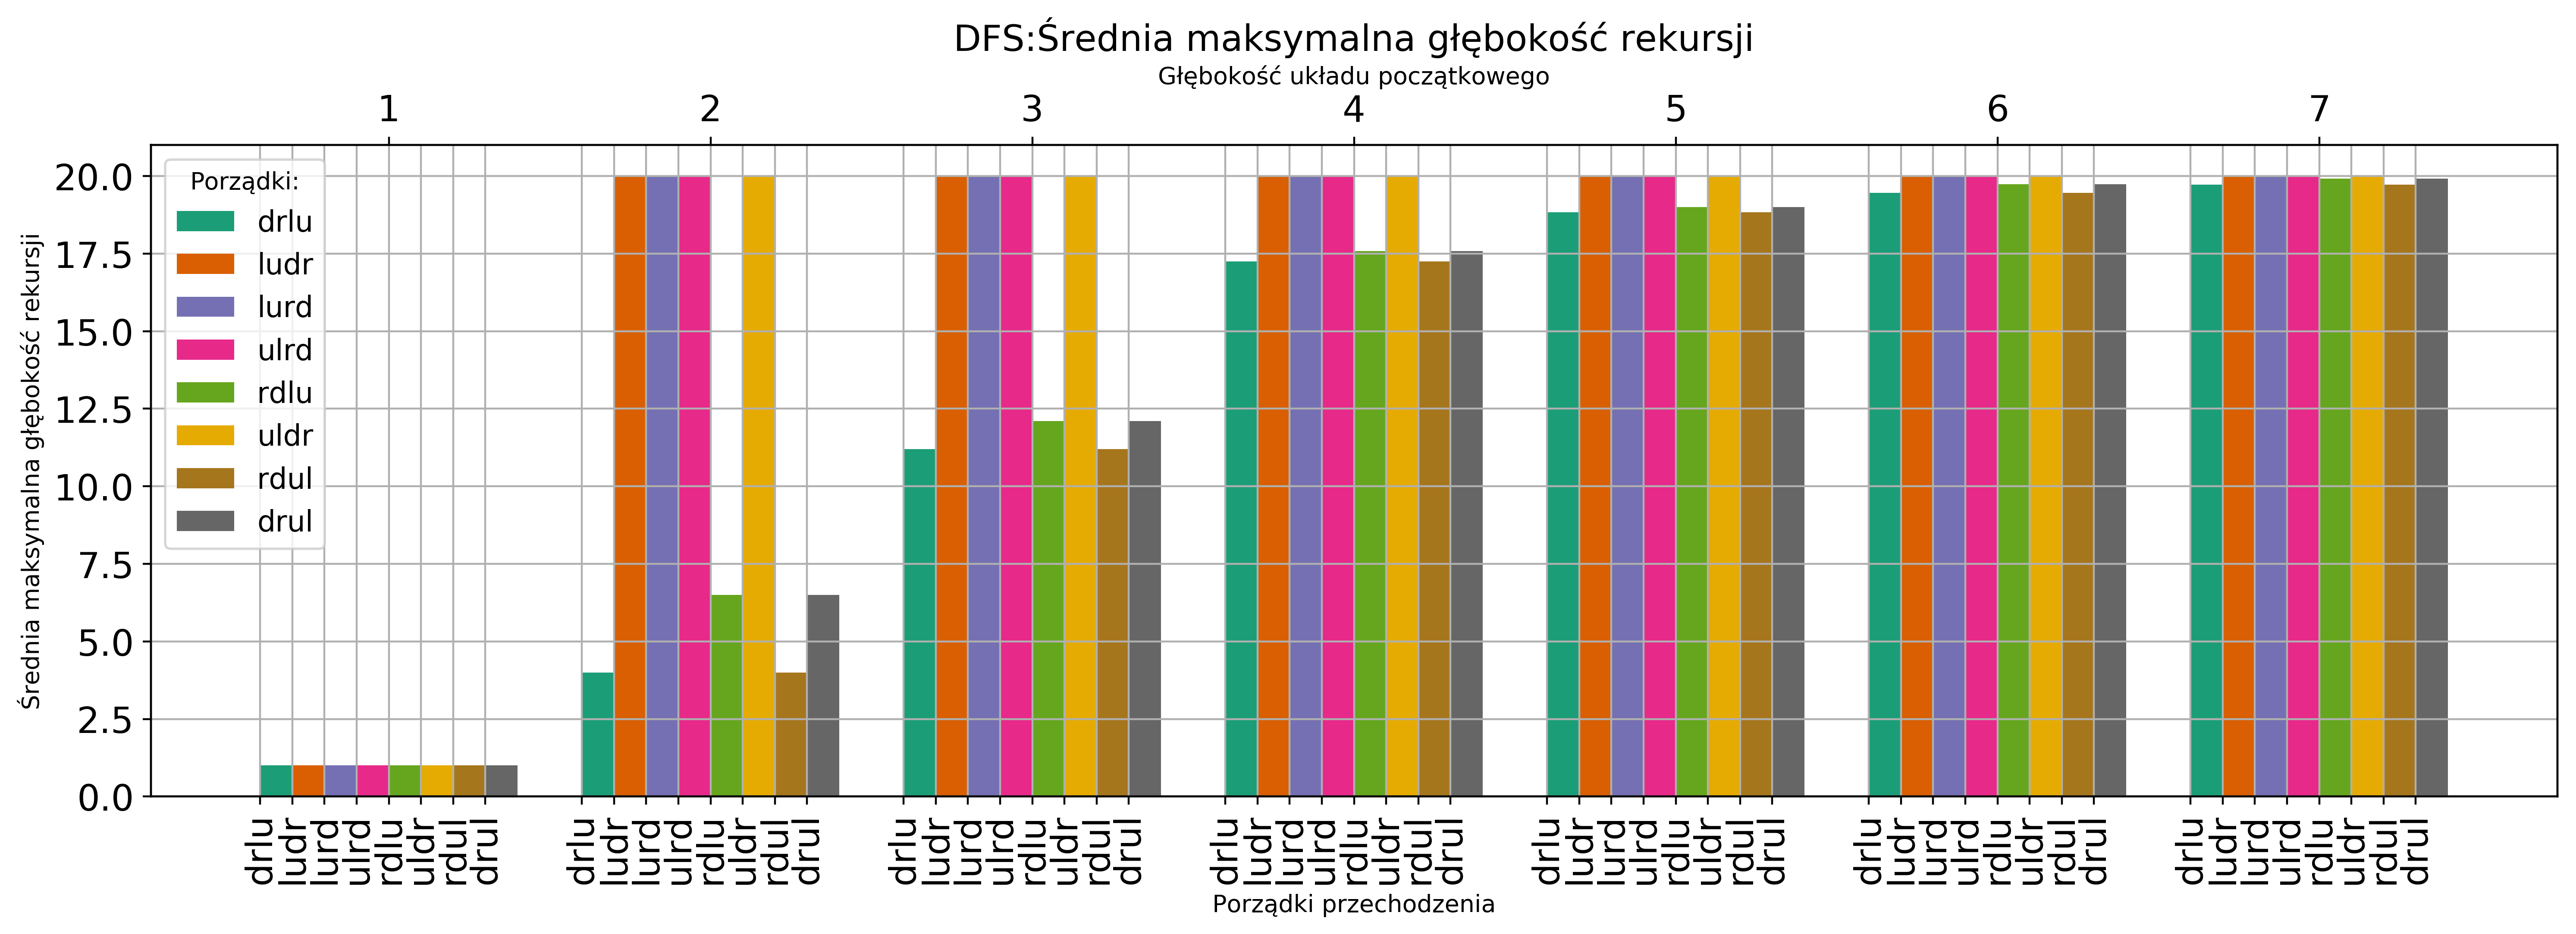

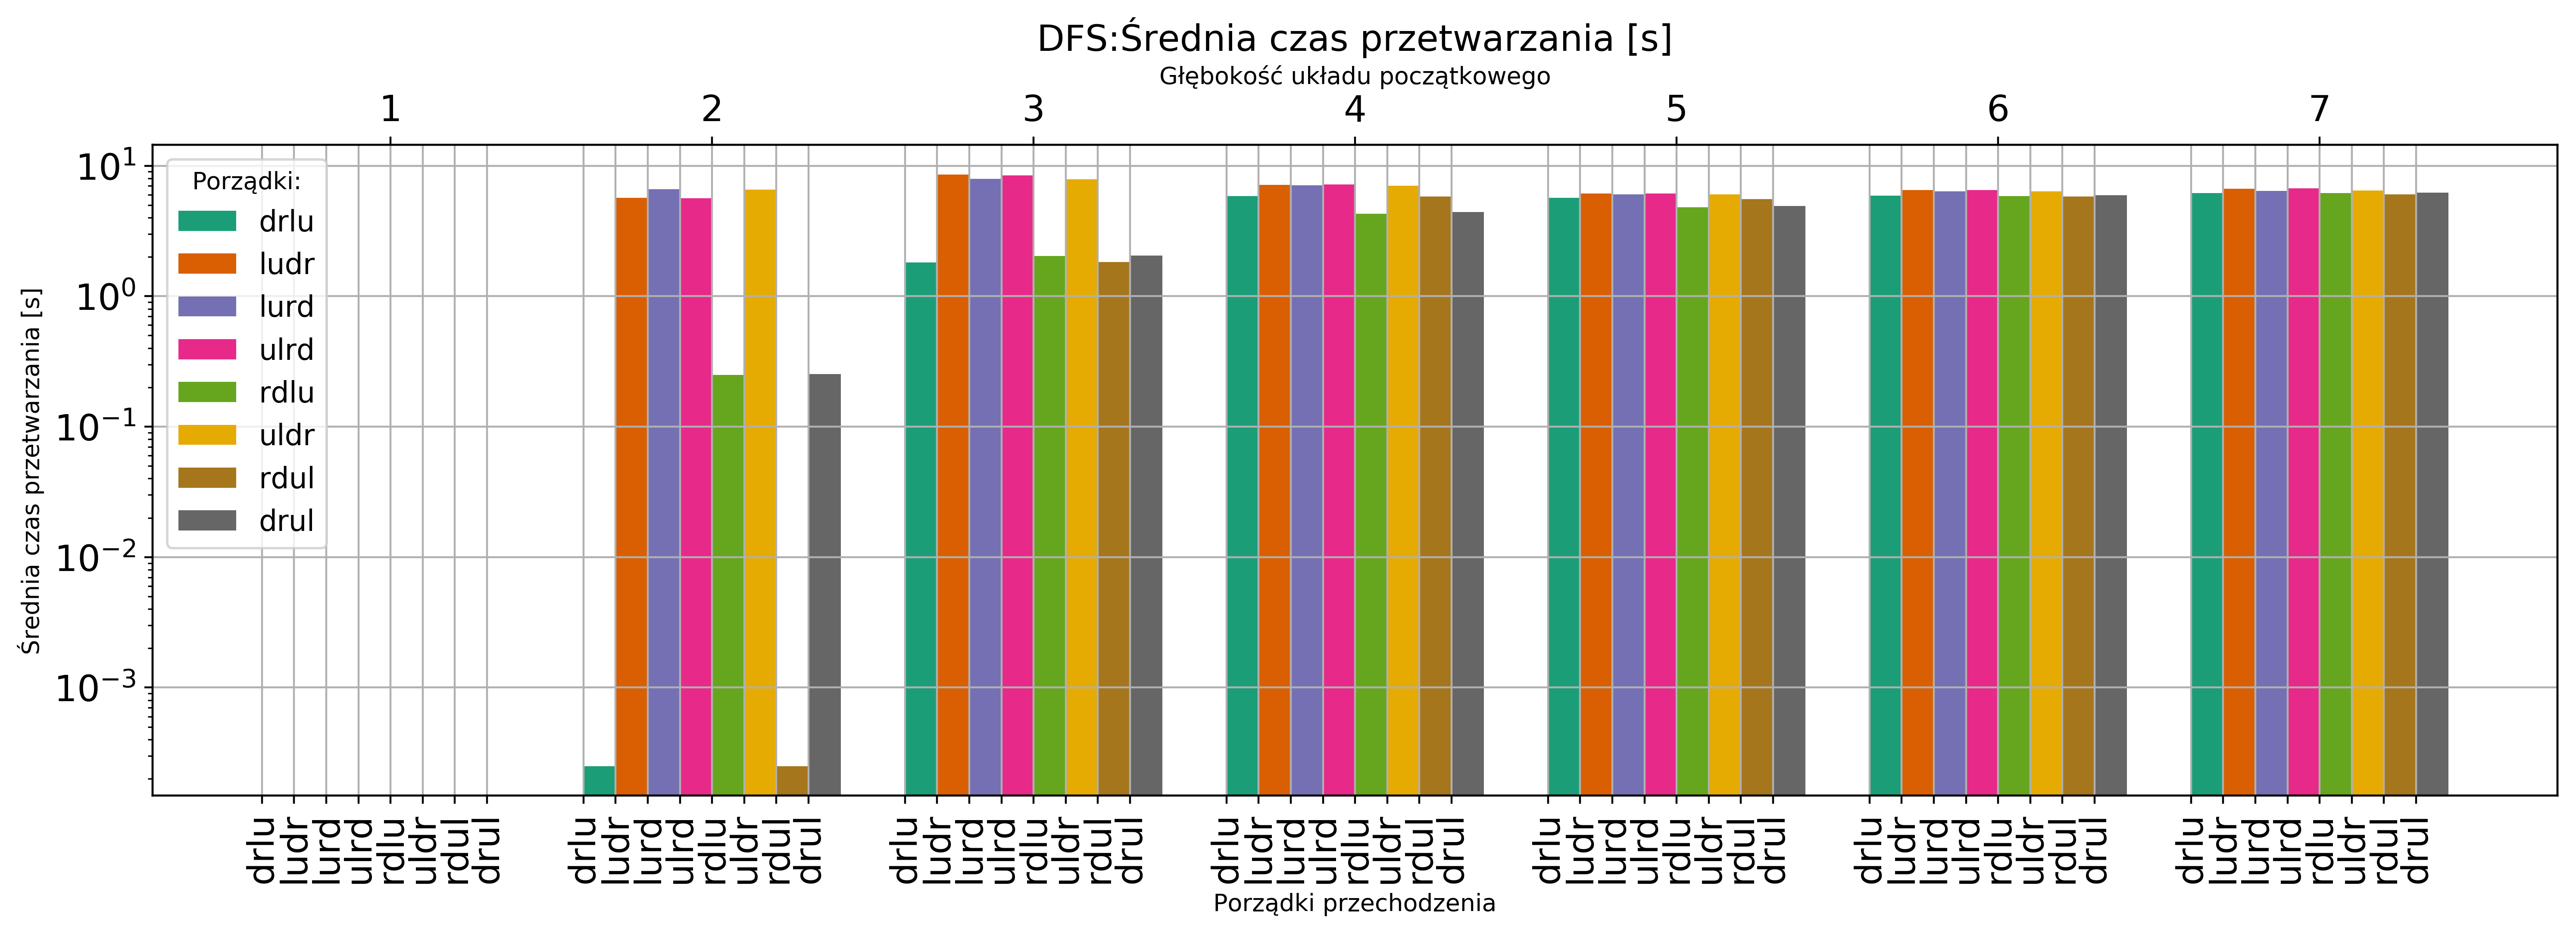

In [ ]:
plot_dfs("visited")
plot_dfs("path_length","linear")
plot_dfs("processed")
plot_dfs("recursed","linear")
plot_dfs("time")

In [ ]:
plot_bfs("visited")
plot_bfs("path_length","linear")
plot_bfs("processed")
plot_bfs("recursed","linear")
plot_bfs("time")